In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.nn import convolution

from celluloid import Camera
from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import clear_output
from time import time
from scipy.special import factorial

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from FiniteDifferences.Maxwell2d import Maxwell2DFiniteDifference, DifferenceType

## A free electromagnetic wave in a box.

In [ ]:
mwell = Maxwell2DFiniteDifference(mesh_size=0.01, step_size=1e-3, frame_rate=60,
                                 diff_type=DifferenceType.FORWARD_DIFFERENCE)

In [ ]:
charge_density_callable = lambda x,y: 0
electric_field_callable = lambda x,y: np.zeros((2,))
magnetic_field_callable = lambda x, y: np.exp(-np.sum(np.square((np.array([x - 0.5, y - 0.5]).reshape((2,1,1)))/0.1), axis=0))

In [ ]:
B, E, I, p = mwell.evolve(magnetic_field_callable, 
                          electric_field_callable, 
                          charge_density_callable, 
                          integration_period=1,
                          order=2,
                          video=True,
                          boundary='dirichlet')

## Two opposite charges placed on a square

In [29]:
def conductivity(x, y):
    return 200 if y < 0.8*x + 0.3 and y > 0.8*x  + 0.2 and 0.8*y > -x + 0.4 and 0.8*y < -x + 1.6 else 0.0

#def conductivity2(x, y):
#    if 2e-2 < x < 1 - 2e-2 and 2e-2 < y < 1 - 2e-2:
#        return 0.0
#    else:
#        return 2e3

In [30]:
#conductivity = lambda x,y: conductivity(x,y) + conductivity2(x,y)

In [31]:
mwell = Maxwell2DFiniteDifference(mesh_size=0.001, step_size=1e-4, frame_rate=60,
                                  conductivity=lambda x,y: conductivity(x,y),
                                 diff_type=DifferenceType.FORWARD_DIFFERENCE)

In [32]:
charge_density_callable = lambda x, y: 1.0 if 0.2<x<0.25 and 0.4<y<0.45 else -1.0 if 0.7<x<0.75 and 0.8<y<0.85 else 0.0
electric_field_callable = lambda x,y: np.zeros((2,))
magnetic_field_callable = lambda x, y: 0.0

In [33]:
np.sum(p)

8.881784197001252e-16

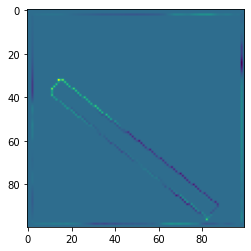

In [34]:
plt.imshow(p)

In [35]:
np.sum(p)

8.881784197001252e-16

In [36]:
p

array([[ 0.00000000e+00, -1.32348898e-19, -1.98523347e-19, ...,
        -7.94093388e-19,  2.64697796e-19,  0.00000000e+00],
       [-1.32348898e-19,  2.64697796e-19,  2.64697796e-19, ...,
        -3.35008148e-19,  0.00000000e+00, -1.05879118e-18],
       [ 0.00000000e+00,  0.00000000e+00, -7.10534070e-06, ...,
         1.38278178e-02, -1.62469782e-02, -1.05879118e-18],
       ...,
       [-5.29395592e-19,  2.11758237e-18,  1.55190257e-02, ...,
        -1.38966343e-16,  3.89257636e-02, -5.29395592e-19],
       [ 3.63959470e-19, -7.94093388e-19, -3.12013582e-04, ...,
         2.20131798e-03, -1.32348898e-19,  2.64697796e-19],
       [ 0.00000000e+00,  2.64697796e-19,  1.81979735e-19, ...,
        -3.30872245e-19,  3.97046694e-19,  0.00000000e+00]])

In [37]:
arrow_num = int(E.shape[0] // 20)

In [38]:
np.max(B)

0.0038094193062934607

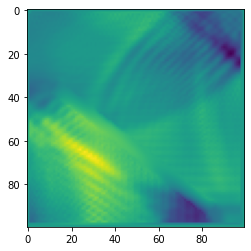

In [39]:
plt.imshow(B)

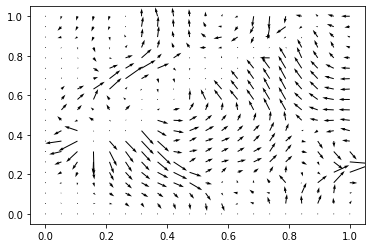

In [40]:
plt.quiver(np.linspace(0, 1, int(E.shape[0] / arrow_num)),
           np.linspace(0, 1, int(E.shape[0] / arrow_num)),
           E[::arrow_num, ::arrow_num, 0]*100,
           E[::arrow_num, ::arrow_num, 1]*100,
           scale=3)

In [42]:
mwell._scales

In [ ]:
B, E, I, p = mwell.evolve(magnetic_field_callable, 
                          electric_field_callable, 
                          charge_density_callable, 
                          integration_period=1,
                          order=5,
                          video=True,
                          boundary='dirichlet')

## A free electromagnetic wave in absorbing box (TODO).

In [ ]:
def conductivity(x, y):
    if 2e-2 < x < 1 - 2e-2 and 2e-2 < y < 1 - 2e-2:
        return 0.0
    else:
        return 1e3
    
def permeability(x, y):
    if 2e-2 < x < 1 - 2e-2 and 2e-2 < y < 1 - 2e-2:
        return 1.0
    else:
        return 8e-1

In [ ]:
mwell = Maxwell2DFiniteDifference(conductivity=conductivity, 
                                  permeability=permeability, 
                                  diff_type=DifferenceType.FORWARD_DIFFERENCE,
                                  mesh_size=0.001, step_size=1e-3, frame_rate=60)

In [ ]:
B, E, I, p = mwell.evolve(magnetic_field_callable, 
                          electric_field_callable, 
                          charge_density_callable, 
                          integration_period=1,
                          order=10,
                          video=True)

## A coin added to the box.

In [ ]:
charge_density_callable = lambda x,y: 0
electric_field_callable = lambda x,y: np.zeros((2,))
magnetic_field_callable = lambda x, y: np.exp(-np.sum(np.square((np.array([x - 0.5, y- 0.5]).reshape((2,1,1)))/0.1), axis=0))
conductivity = lambda x, y: 100.0 if np.sqrt((x - 0.2)**2 + (y-0.2)**2) < 0.1 else 0.0

In [ ]:
mwell = Maxwell2DFiniteDifference(mesh_size=0.001, 
                                  step_size=1e-3, 
                                  diff_type=DifferenceType.FORWARD_DIFFERENCE,
                                  conductivity=conductivity, 
                                  frame_rate=8)

In [ ]:
B, E, I, p = mwell.evolve(magnetic_field_callable, 
                          electric_field_callable, 
                          charge_density_callable, 
                          integration_period=6,
                          order=10,
                          video=True)

## Dipole antenna

In [ ]:
charge_density_callable = lambda x,y: 0
electric_field_callable = lambda x,y: np.zeros((2,))
magnetic_field_callable = lambda x, y: np.exp(-np.sum(np.square((np.array([x - 0.3, y- 0.5]).reshape((2,1,1)))/0.1), axis=0)) - \
                                       np.exp(-np.sum(np.square((np.array([x - 0.7, y- 0.5]).reshape((2,1,1)))/0.1), axis=0))

In [ ]:
def antenna(x, y):
    if 0.45 < x < 0.55 and 0.2 < y < 0.8:
        return 100
    else:
        return 0.0

def conductivity(x, y):
    if 2e-2 < x < 1 - 2e-2 and 2e-2 < y < 1 - 2e-2:
        return 0.0
    else:
        return 1e3

In [ ]:
mwell = Maxwell2DFiniteDifference(mesh_size=0.001, 
                                  diff_type=DifferenceType.FORWARD_DIFFERENCE,
                                  step_size=1e-3, 
                                  conductivity=lambda x,y: conductivity(x,y) + antenna(x,y), 
                                  frame_rate=8)

In [ ]:
B, E, I, p = mwell.evolve(magnetic_field_callable, 
                          electric_field_callable, 
                          charge_density_callable, 
                          integration_period=20,
                          order=10,
                          video=True)

In [ ]:
plt.imshow(p)